### **Web Scraping with Beautiful Soup**
##### Web scraping is a technique used to extract data from websites. In this case, we'll use the Beautiful Soup library to scrape movie information from the IMDB Top Movies webpage.

##### Beautiful soup is a python library designed for web scraping.

In [ ]:
!pip install bs4 requests matplotlib seaborn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the BBC News homepage
url = "https://www.bbc.com/news"

# Send an HTTP GET request to the URL
response = requests.get(url)

#Check if the request was successful (status code 200) Status codes 204 and 400 indicate page error or page not found
if response.status_code==200:
    print("Request successful")
else:
    print("Request failed")

# with open('asvanth.html') as html_file:
#     soup=BeautifulSoup(html_file,'html.parser')
# print(soup)

# Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(response.text, "html.parser")

# Extract news headlines and summaries
headlines = []
summaries=[]

for article in soup.select(".gs-c-promo-body"):
    headline = article.find("h3").text
    summary_elem = article.find("p")
    summary = summary_elem.text if summary_elem else "No summary available"
    headlines.append(headline)
    summaries.append(summary)

# Transform the extracted data into a Pandas DataFrame
news={
    "Headline":headlines,
    "Summary":summaries
}
news_df=pd.DataFrame(news)

# Display the transformed DataFrame
print("\nTransformed DataFrame:")
print(news_df)

In [ ]:
print("\nNews:")
for i, (headline, summary) in enumerate(zip(headlines, summaries),start=1):
    print(f"{i}. {headline}\n{summary}\n")

### **Reading files with Pandas**
##### Pandas is a popular library for data manipulation and analysis. Here, we'll use Pandas to read the Titanic passenger data from a CSV file.
##### Download the train.csv dataset from https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd

# Read Titanic passenger data from CSV file
file_path = "train.csv"
titanic_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("First few rows of the Titanic DataFrame:")
print(titanic_data.head())

# Display column names
print("\nColumn names:")
print(titanic_data.columns)

# Display number of rows and columns
print("\nNumber of rows and columns:")
print(titanic_data.shape)

# Summary statistics
print("\nSummary statistics:")
print(titanic_data.describe())

# Filter passengers with age greater than 60
senior_passengers = titanic_data[titanic_data['Age'] > 60]
print("\nPassengers with age greater than 60:")
print(senior_passengers)

# Sort passengers by fare in descending order
sorted_data = titanic_data.sort_values(by='Fare', ascending=False)
print("\nSorted data by fare:")
print(sorted_data.head())

# Group by passenger class and calculate averages
class_avg = titanic_data.groupby('Pclass').agg({'Age': 'mean', 'Fare': 'mean'})
print("\nAverage age and fare by passenger class:")
print(class_avg)

First few rows of the Titanic DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0      

C:\Users\Arunvenkat\AppData\Local\Temp\ipykernel_17624\2835342828.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_data, ci=None)


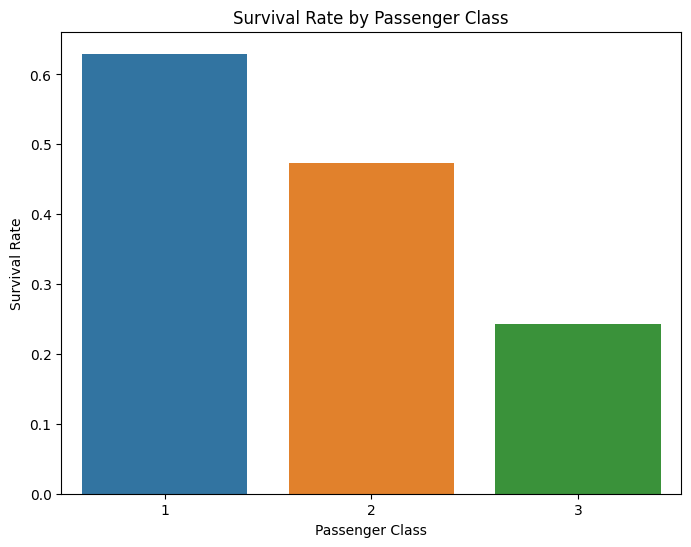

In [36]:
# Data visualization: Survival rate by passenger class
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_data, ci=None)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

### **Data Cleaning with Pandas**
##### Data cleaning involves handling missing or incorrect data. Here, we'll generate synthetic sales data with missing values and then clean the data by removing rows with missing values.

In [37]:
import pandas as pd
import numpy as np

In [38]:
# Generate synthetic sales data with missing values
np.random.seed(0)
data = {
    "Date": pd.date_range(start="2023-01-01", periods=10, freq="M"),
    "Sales": np.random.choice([None, 1000, 2000, 3000, 4000], size=10),
}
sales_data = pd.DataFrame(data)

# Display the original dataset
print("Original Data:")
print(sales_data)

# Technique 1: Drop the Feature
sales_data_dropped_feature = sales_data.drop(columns=["Sales"])

# Technique 2: Drop the Observation
sales_data_dropped_observation = sales_data.dropna()

# Technique 3: Impute the Missing Values (using mean)
mean_sales = sales_data["Sales"].mean()
sales_data_imputed_mean = sales_data.copy()
sales_data_imputed_mean["Sales"].fillna(mean_sales, inplace=True)

# Display results
print("\nDropped Feature:")
print(sales_data_dropped_feature)

print("\nDropped Observation:")
print(sales_data_dropped_observation)

print("\nImputed Data (Mean):")
print(sales_data_imputed_mean)

Original Data:
        Date Sales
0 2023-01-31  4000
1 2023-02-28  None
2 2023-03-31  3000
3 2023-04-30  3000
4 2023-05-31  3000
5 2023-06-30  1000
6 2023-07-31  3000
7 2023-08-31  2000
8 2023-09-30  4000
9 2023-10-31  None

Dropped Feature:
        Date
0 2023-01-31
1 2023-02-28
2 2023-03-31
3 2023-04-30
4 2023-05-31
5 2023-06-30
6 2023-07-31
7 2023-08-31
8 2023-09-30
9 2023-10-31

Dropped Observation:
        Date Sales
0 2023-01-31  4000
2 2023-03-31  3000
3 2023-04-30  3000
4 2023-05-31  3000
5 2023-06-30  1000
6 2023-07-31  3000
7 2023-08-31  2000
8 2023-09-30  4000

Imputed Data (Mean):
        Date   Sales
0 2023-01-31  4000.0
1 2023-02-28  2875.0
2 2023-03-31  3000.0
3 2023-04-30  3000.0
4 2023-05-31  3000.0
5 2023-06-30  1000.0
6 2023-07-31  3000.0
7 2023-08-31  2000.0
8 2023-09-30  4000.0
9 2023-10-31  2875.0


### **Data Visualization with Matplotlib and Seaborn (Histogram)**
##### Data visualization helps us understand data patterns. Here, we'll use Matplotlib and Seaborn to create a histogram showing the distribution of exam scores.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

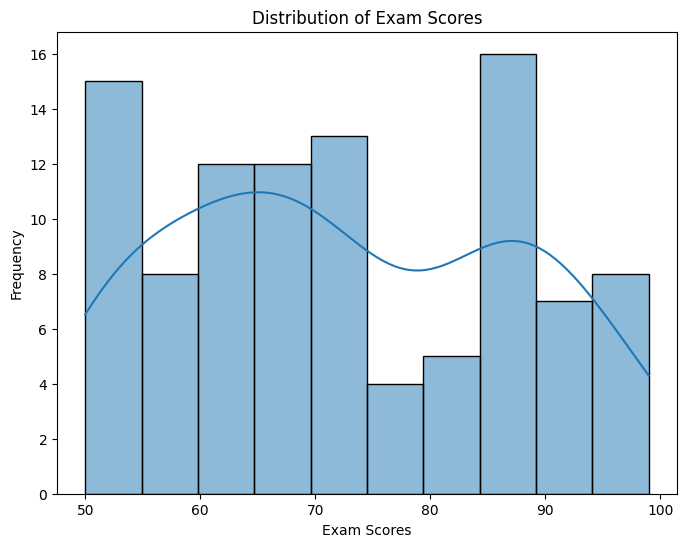

In [40]:
# Generate synthetic exam scores
np.random.seed(0)
exam_scores = np.random.randint(50, 100, size=100)

# Create a histogram with Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(exam_scores, bins=10, kde=True)
plt.xlabel("Exam Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Exam Scores")
plt.show()

### **Box Plots**
##### In this example, we'll use Seaborn to create a box plot showing the distribution of Titanic passengers' ages. 

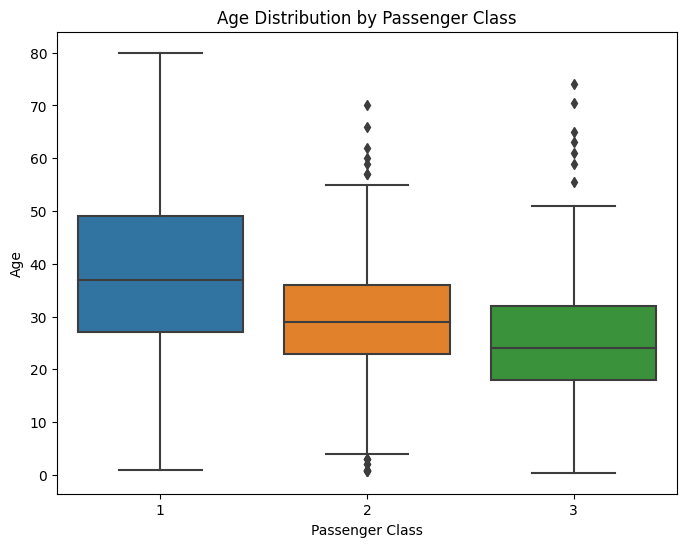

In [41]:
# Create a box plot with Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="Pclass", y="Age", data=titanic_data)
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.title("Age Distribution by Passenger Class")
plt.show()

### **Bar Charts**
##### Here, we'll use Seaborn to create a bar chart displaying the counts of passengers by gender.

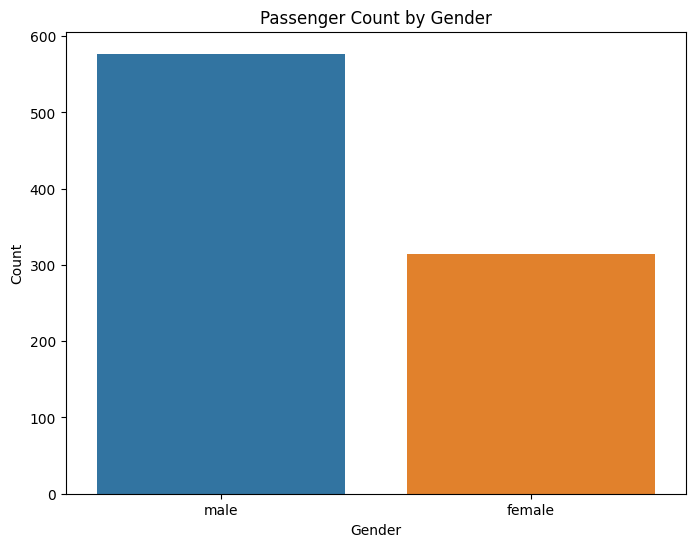

In [42]:
# Create a bar chart with Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x="Sex", data=titanic_data)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Passenger Count by Gender")
plt.show()

### **Heat maps**
##### Heat maps show the magnitude of values in a matrix format. In this example, we'll use Seaborn to create a heat map to visualize the correlation matrix of numeric variables in the Titanic dataset. 

C:\Users\Arunvenkat\AppData\Local\Temp\ipykernel_17624\314045238.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_data.corr()


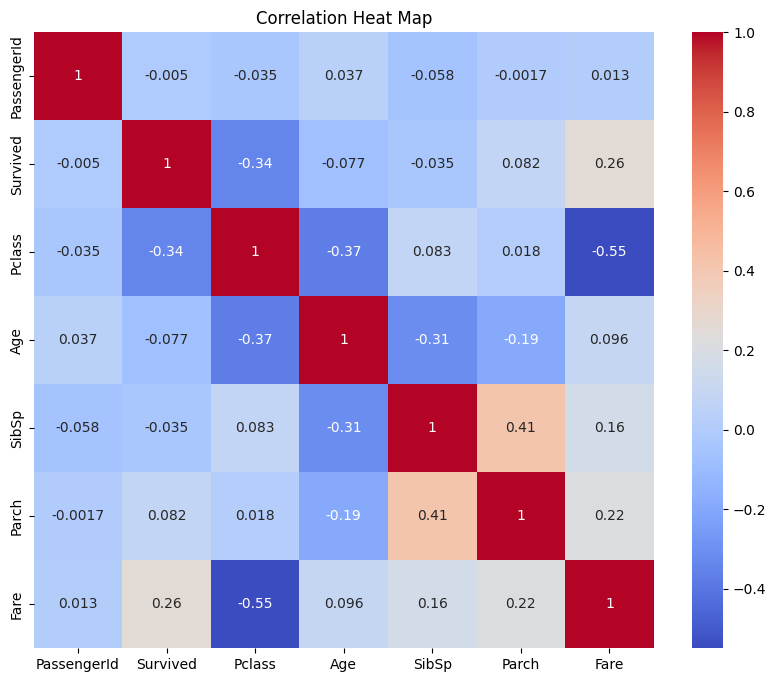

In [43]:
# Calculate the correlation matrix
correlation_matrix = titanic_data.corr()

# Create a heat map with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heat Map")
plt.show()

### **What is a good visualization?**
#####  Visualizations can be good or bad depending on their effectiveness. Here, we'll compare a good visualization (line plot) and a bad visualization (pie chart) for monthly sales data.

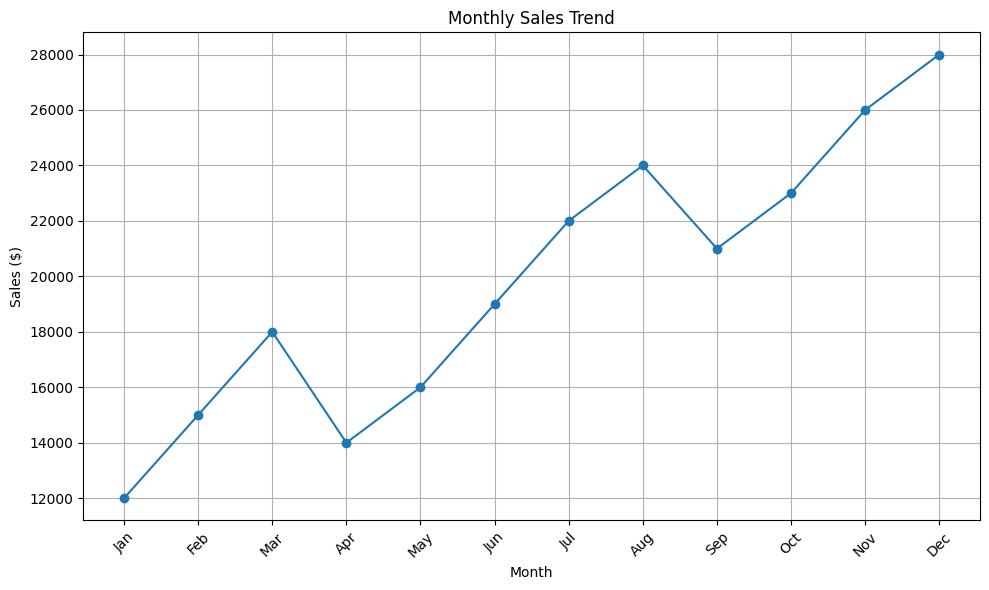

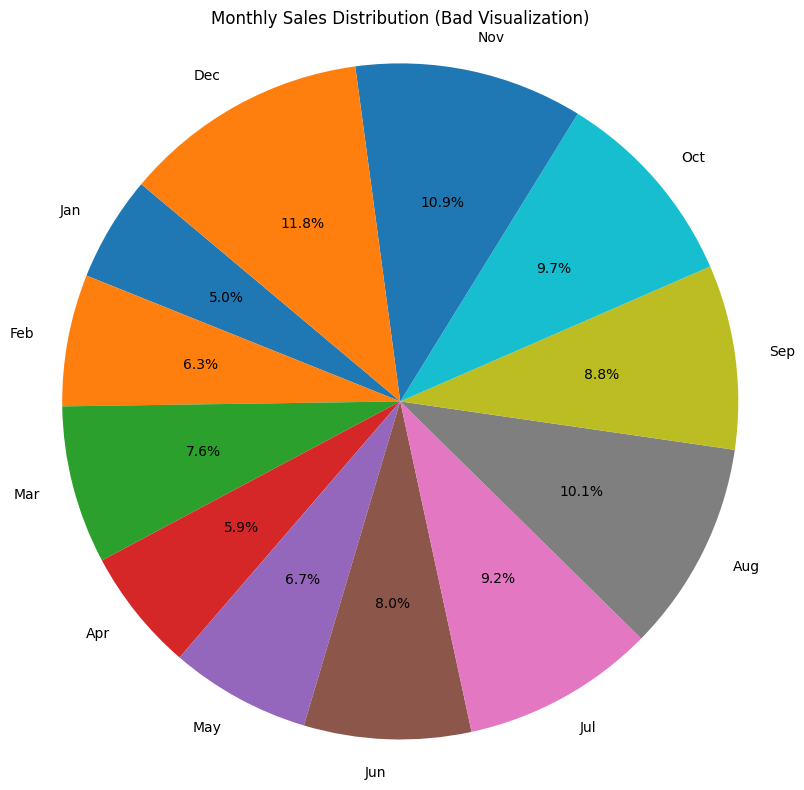

In [44]:
# Sample monthly sales data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales = [12000, 15000, 18000, 14000, 16000, 19000, 22000, 24000, 21000, 23000, 26000, 28000]

# Good Visualization: Line Plot
plt.figure(figsize=(10, 6))
plt.plot(months, sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bad Visualization: Pie Chart (Not suitable for this scenario)
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=months, autopct='%1.1f%%', startangle=140)
plt.title('Monthly Sales Distribution (Bad Visualization)')
plt.axis('equal')
plt.tight_layout()
plt.show()